# Multimodal Data Fusion - Exercise 5: Sequential Bayesian Inference


In this exercise, we will take a closer look at the sequential modeling of (multimodal) data using recursive Bayesian filtering framework and especially Kalman filters. You will be learning about Kalman filter applied to single sensor problem as well as fusing multi-sensor data.

## Learning goals 

After this round, you should  

- be able to apply Kalman filter for simple dynamic problem utilizing single sensor data 
- be able to apply Kalman filter for multi-sensor fusion and localization
- be familiar with [filterpy](https://filterpy.readthedocs.io/en/latest/index.html) library

## Relevant lecture

Lecture 6
  
## Relevant chapter in course book

Chapter 12

## Additional Material 

* Kalman Filters [Kalman and Bayesian Filters in Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python)

# Kalman Filter Tutorial

## Introduction

In this exercise, basics of sequential Bayesian inference using recursive Bayesian filtering framework is studied. More specifically, we will be concentrating on linear Gaussian state-space models by implementing and applying basic Kalman filters to one- and multidimensional problems. In each exercise assignment, the linear Gaussian state-space model is formulated as 
<br>
<br>
$
\begin{equation}
\mathbf{x}_k = \mathbf{F}\mathbf{x}_{k-1} + \mathbf{q}_{k-1} \\
\mathbf{y}_k = \mathbf{H}\mathbf{x}_k + \mathbf{r}_k,
\end{equation}
$
<br>
where 
<br>
<br>
$\mathbf{x}_k$ is $n$-dimensional state vector $\mathbf{x_k} = [x^1, x^2, \ldots, x^n]^T$ 
<br>
$\mathbf{y}_k$ is $m$-dimensional measurement vector $\mathbf{y_k} = [y^1, y^2, \ldots, y^m]^T$ 
<br>
$\mathbf{F}$ is $nxn$ transition matrix
<br>
$\mathbf{H}$ is $mxn$ observation matrix
<br>
$\mathbf{q}_{k-1}$ is process noise, normally distributed as $\mathbf{q}_{k-1} \sim \mathcal{N}(0, \mathbf{Q}_{k-1})$
<br>
$\mathbf{r}_{k}$ is observation/measurement noise, normally distributed as $\mathbf{r}_k \sim \mathcal{N}(0, \mathbf{R}_k)$
<br>
<br>
For more detailed background, take a look at Lecture 6. and course book chapter 12.
<br>
<br>
Two different dynamic process models $\mathbf{x}_k = \mathbf{F}\mathbf{x}_{k-1} + \mathbf{q}_{k-1}$ are used in this exercise
<br>
1. Gaussian random walk model, where
<br>
<br>
$
\begin{equation}
\mathbf{F}=\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
, 
\mathbf{Q}=\begin{bmatrix}
\sigma^2 & 0\\
0 & \sigma^2
\end{bmatrix}
\end{equation}
$
<br>
<br>
as an example for 2-dimensional state-space. $\sigma^2$ denotes the process noise variance (here same for both dimensions)
<br>
<br>
2. Contant velocity model, where
<br>
<br>
$
\begin{equation}
\mathbf{F}=\begin{bmatrix}
1 & 0 & \Delta t & 0\\
0 & 1 & 0 & \Delta t\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
, 
\mathbf{Q}=\begin{bmatrix}
q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2 & 0\\
0 & q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2\\
q_c \Delta t^2/2 & 0 & q_c \Delta t & 0\\
0 & q_c \Delta t^2/2 & 0 & q_c \Delta t
\end{bmatrix}
\end{equation}
$
<br>
<br>
as an example for 4-dimensional state-space, including position ($p_x, p_y$) and velocity ($v_x, v_y$) variables, i.e., $\mathbf{x} = [p_x, p_y , v_x, v_y]^T$. $\Delta t$ is the time difference and $q_c$ denotes the spectral density (continuous time variance) of the process noise (here same for both dimensions)

## Outputs:

Problem 1.1 and 1.2
<table><tr>
    <td>
        <img src="images/problem1.1_1.2.png" width=400 height=200>
    <td>
        <img src="images/problem1.1_1.2_2.png" width=400 height=200>


Problem 2.1 and 2.2
<table><tr>
    <td>
        <img src="images/problem2.1.png" width=800 height=400 />
    <td>
        <img src="images/problem2.2.png" width=800 height=400 />


Problem 2.3 and 2.4
<table><tr>
    <td>
        <img src="images/problem2.3.png" width=800 height=400 />
    <td>
        <img src="images/problem2.4.png" width=800 height=400 />


RMSE values: 

Problem 2.2 GPS:  0.5149323143014761 WiFi:  0.8220195557654705

Problem 2.3 GPS+WiFi:  0.4520847800602624

Problem 2.4 GPS+WiFi+constant_velocity:  0.3554965144493585

# Kalman Filter for Single Sensor: ECG trend removal

<a id='task1.1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 1.1 

Load ECG time-series data from file 'noisy_ecg.csv'. Implement your own 1D Kalman filter (KF) prediction and update/correction steps below to track the trend of signal (i.e., moving average). Run the algorithm with given data and plot data and KF mean estimates to same figure. In addition, plot the signal where the trend / mean is removed from the original signal. Algorithm is presented in Lecture 6. In addition, there is an example in Lecture 2 (page 31).
<br>    
<p> Use following setup, initial values, and parameters with your KF implementation:</p>
<p> * Initialize state mean $\mu$ to first measurement </p>
<p> * Initialize state variance as $\Sigma = 10$ </p>   
<p> * Use random walk dynamical model with Gaussian noise variance $Q = 5$ </p>   
<p> * Use measurement model with Gaussian noise variance $R = 20$ </p> 
<br>
Note that you can formulate the KF with scalar operations or using matrix and vector operations with 1d matrices and vectors (as presented above and in lectures).
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load the data
z = np.genfromtxt('noisy_ecg.csv', delimiter=',')

def predict(mu, Sigma, F, Q):
    # Implement your code here
    mu = F @ mu
    Sigma = F @ Sigma @ F.transpose() + Q
    return mu, Sigma

def update(y, mu, Sigma, H, R):
    # Implement your code here
    # Hint: Consider numerical stability formulation for Sigma (as presented in the lecture)
    I = np.identity(np.shape(H)[0])
    K = Sigma @ H @ np.linalg.inv(H @ Sigma @ H.transpose() + R)
    mu = mu + K @ (y - H @ mu)
    Sigma = (I - K @ H) @ Sigma @ (I - K @ H).transpose() + K @ R @ K.transpose()
    return mu, Sigma

# values initialized here
mu = np.array([[z[0]]])
F = np.array([[1]])
H = np.array([[1]])
Sigma = np.array([[10]])
R = np.array([[20]])
Q = np.array([[5]])
output = np.zeros(z.shape[0])

# run your filter in a loop for input data point using your prediction and update(/correction) steps
# store each filtered mean value to output

# Implement Your filtering loop here
mu_s = []

for z_i in z:
    mu, Sigma = predict(mu, Sigma, F, Q)
    mu, Sigma = update(z_i, mu, Sigma, H, R)
    mu_s.append(mu)

# visualize the results as given in assignment

# Implement ploting here

f = plt.figure(figsize=(20,5))
f.add_subplot(1, 2, 1)
plt.plot(z)

f.add_subplot(1, 2, 2)
mu_s = np.reshape(mu_s, ((-1,1)))
plt.plot(z)
plt.plot(mu_s, 'r')

<a id='task1.2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 1.2 
    
Implement the similar KF algorithm using [filterpy](https://filterpy.readthedocs.io/en/latest/index.html) with additional information provided in [Kalman and Bayesian Filters in Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python). Install [filterpy](https://filterpy.readthedocs.io/en/latest/index.html) library (e.g., pip install filterpy) if you have not done yet, and get yourself familiar with its functionalities. Use same data as in previous task and plot the the result and answer the question. Note that filterpy uses $\mathbf{x}$ and $\mathbf{P}$ for model state mean and covariance. 
<br>
<br>
Q1. Are you able to get the same result as in task 1.1?

</div>

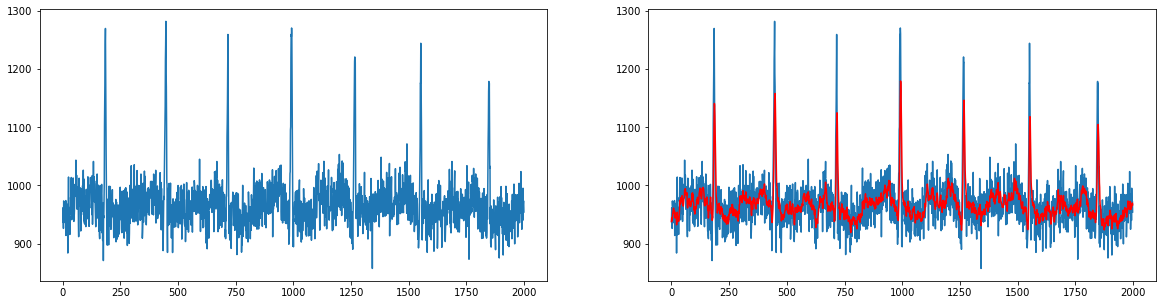

In [2]:
#Implement your code here.
from filterpy.kalman import KalmanFilter

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = z[0]
kf.F = F
kf.H = H
kf.P = Sigma
kf.R = R

x = []

for z_i in z:
    kf.predict()
    kf.update(z_i)
    x.append(kf.x)
    
f = plt.figure(figsize=(20,5))
f.add_subplot(1, 2, 1)
plt.plot(z)

f.add_subplot(1, 2, 2)
x = np.reshape(x, ((-1,1)))
plt.plot(z)
plt.plot(x, 'r')

# Kalman Filter for Multi-data Fusion: Robot Tracking and Localization

## Robot location data loading and visualization

<a id='task2.1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.1 

Load robot tracking and localization dataset from file 'robot_gps_wifi_localization.csv' using pandas. Dataset contains simulated GPS and WiFi location data with ground truths (GT) of mobile robot moving in 2D environment. 
Plot ground truth path as well as GPS and WiFi measurements to same figure and answer the questions. 
<br>
<br>
<p> Q1. What can you say about the measurements and their noise level? </p>
<p> Q2. How well they estimate the true location? </p>
</div>

        gps_x      gps_y
0    0.220614  -0.165435
1    1.474879  -0.123514
2    0.573792   0.796304
3    0.323865  -0.288223
4    1.131776  -0.154808
..        ...        ...
375  0.689772  13.820595
376  1.180781  15.688883
377 -0.301750  15.115098
378  0.410064  14.197576
379 -0.267616  15.628516

[380 rows x 2 columns]


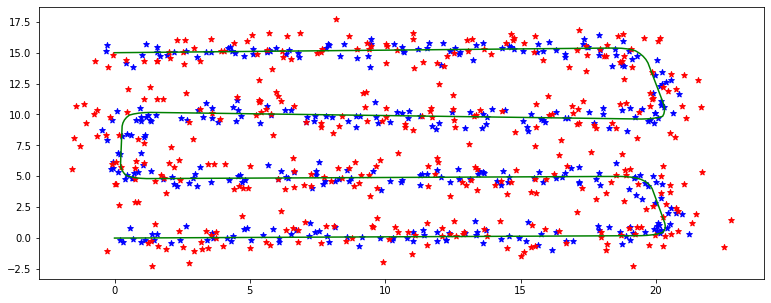

In [3]:
#Implement your code here.
import pandas as pd

df = pd.read_csv('robot_gps_wifi_localization.csv')
gt_locations = df.iloc[:, 1:3]
gps_pos = df.iloc[:, 3:5]
wifi_pos = df.iloc[:, 5:7]
print(gps_pos)
f = plt.figure(figsize=(13,5))
plt.plot(gt_locations.iloc[:, 0], gt_locations.iloc[:,1], 'g')
plt.scatter(gps_pos.iloc[:, 0], gps_pos.iloc[:,1], c='b', marker='*')
plt.scatter(wifi_pos.iloc[:, 0], wifi_pos.iloc[:,1], c='r', marker='*')

Q1: The measurements seem to be quite good in some place, but still the noise level is quite high and the number of outliers is quite large
Q2: Without plotting the ground truth, it is quite hard (almost impossible) to detect the path of the robot and one could easily find invalid paths, just by looking at the raw measurements.

## Independent GPS and WiFi Kalman Filters

<a id='task2.2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.2 

Implement Kalman filters for GPS and WiFi measurements indepedently using filterpy library. Run algorithms using the dataset above and plot the measurements and KF results against the ground truth (GT) path. Compare the results using root mean square error (RMSE) between filter mean estimates and GT. Answer the questions.
<br>
<br>
RMSE is calculated as 
<br>
$
\begin{equation}
RMSE = \sqrt{\frac{1}{N}\sum_i^N (\mathbf{x}_i - \tilde{\mathbf{x}}_i)^2},
\end{equation}
$
<br>
where $\mathbf{x}_i$ is the $i$th true location (GT) and $\tilde{\mathbf{x}}_i)$ is $i$th location estimate by KF.
<br> 
<p> Use following setup, initial values, and parameters with your KF implementations:</p>
<p> * Initialize model state mean vector $\mathbf{x}=\begin{bmatrix}p_x \\ p_y \end{bmatrix}$ with position estimates ($p_x$, $p_y$) to the first ground truth location </p>
<p> * Initialize model state covariance $\mathbf{P} = \begin{bmatrix} \sigma_{p_x}^2 & 0 \\ 0 & \sigma_{p_y}^2 \end{bmatrix}$ where $\sigma_{p_x}^2=2.0$ and $\sigma_{p_y}^2=2.0$ are position noise variances</p>   
<p> * Use random walk dynamical model with Gaussian noise $\mathbf{Q} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$ where $\sigma^2=1.0$ is process noise variance</p> 
<p> * Use measurement model with Gaussian noise $\mathbf{R} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$ where measurement noise variances are $\sigma^2=5.0$ for GPS and $\sigma^2=10.0$ for WiFi model </p>     
<p> * Set $\mathbf{F}$ and $\mathbf{H}$ based on dimensions of state and observation/measurement vectors
<br> 
<br>
<p> Q1. How well the KF can estimate the location from noisy measurements in each case? </p>
<p> Q2. How GPS and Wifi based methods compared to each other based on RMSE? </p>
</div>

(380, 2)
The GPS error is  0.5149323143014762
(380, 2)
The WIFI error is  0.8220195557654705


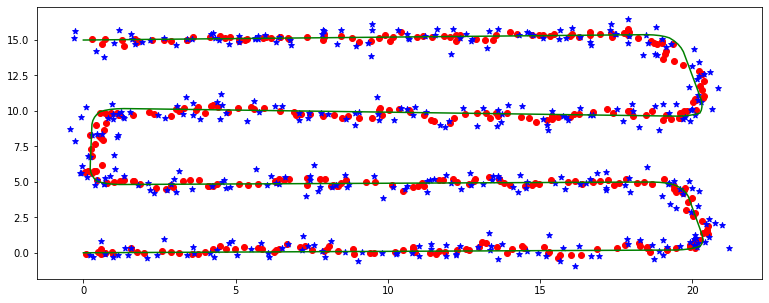

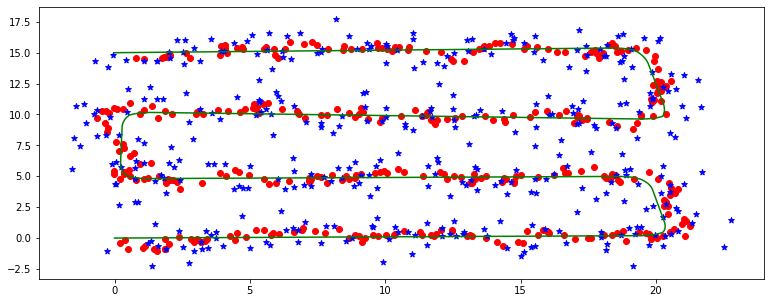

In [7]:
#Implement your code here.

kf_gps = KalmanFilter(dim_x=2, dim_z=2)
kf_gps.x =gt_locations.iloc[0,:].to_numpy()
kf_gps.P = np.array([[2., 0.], [0., 2.]])
kf_gps.R = np.array([[5., 0.], [0., 5.]])
kf_gps.Q = np.array([[1., 0.], [0., 1.]])
kf_gps.F = np.identity(2)
kf_gps.H = np.identity(2)

log=[]
for i in range(gps_pos.shape[0]):
#     print(gps_pos.iloc[i,:].shape)
#     print(gps_pos.iloc[i,:])
    kf_gps.predict()
    kf_gps.update(gps_pos.iloc[i,:])
    log.append(kf_gps.x)
log=np.array(log)
print(log.shape)
f = plt.figure(figsize=(13,5))
plt.plot(gt_locations.iloc[:, 0], gt_locations.iloc[:,1], 'g')
plt.scatter(log[:,0],log[:,1],c='r')
plt.scatter(gps_pos.iloc[:, 0], gps_pos.iloc[:,1], c='b', marker='*')
error=np.sqrt(np.sum(np.mean((log[:,0:2] - gt_locations.iloc[:, 0:2]) ** 2)))
print("The GPS error is ", error)




kf_wifi = KalmanFilter(dim_x=2, dim_z=2)
kf_wifi.x =gt_locations.iloc[0,:].to_numpy()
kf_wifi.P = np.array([[2., 0.], [0., 2.]])
kf_wifi.R = np.array([[10., 0.], [0., 10.]])
kf_wifi.Q = np.array([[1., 0.], [0., 1.]])
kf_wifi.F = np.identity(2)
kf_wifi.H = np.identity(2)

log=[]
for i in range(gps_pos.shape[0]):
#     print(gps_pos.iloc[i,:].shape)
#     print(gps_pos.iloc[i,:])
    kf_wifi.predict()
    kf_wifi.update(wifi_pos.iloc[i,:])
    log.append(kf_wifi.x)
log=np.array(log)
print(log.shape)
f = plt.figure(figsize=(13,5))
plt.plot(gt_locations.iloc[:, 0], gt_locations.iloc[:,1], 'g')
plt.scatter(log[:,0],log[:,1],c='r')
plt.scatter(wifi_pos.iloc[:, 0], wifi_pos.iloc[:,1], c='b', marker='*')
error=np.sqrt(np.sum(np.mean((log[:,0:2] - gt_locations.iloc[:, 0:2]) ** 2)))
print("The WIFI error is ", error)


Q1. The KF estimates pretty well the location from the measurements especially in the case of the GPS but still it lacks practical accuracy and sometimes it gets confused by outliers.
Q2. The GPS is more accurate because of the lower variance and thus is more realiable compared to the WIFI.

## Measurement Fusion with Kalman Filter

<a id='task2.3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.3 

Extend the KF model from previous problem 2.2 with fused GPS and WiFi measurements using filterpy library and same random walk dynamic model. Use single model with two-dimensional measurements. Run algorithm using the dataset above and plot the KF results against the ground truth (GT) path. Compare the results using root mean square error (RMSE) between filter mean estimates and GT. Answer the questions.

<p> Use following setup, initial values, and parameters with your KF implementations:</p>
<p> * Initialize model state mean vector $\mathbf{x}=\begin{bmatrix}p_x \\ p_y \end{bmatrix}$ with position estimates ($p_x$, $p_y$) to the first ground truth location</p>
<p> * Initialize model state covariance $\mathbf{P} = \begin{bmatrix} \sigma_{p_x}^2 & 0 \\ 0 & \sigma_{p_y}^2 \end{bmatrix}$ where $\sigma_{p_x}^2=2.0$ and $\sigma_{p_y}^2=2.0$ are position noise variances</p>   
<p> * Use random walk dynamical model with Gaussian noise $\mathbf{Q} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$ where $\sigma^2=1.0$ is process noise variance</p> 
<p> * Use measurement model with Gaussian noise $\mathbf{R} = \begin{bmatrix}\sigma_{GPS}^2 & 0 & 0 & 0 \\ 0 & \sigma_{GPS}^2 & 0 & 0 \\ 0 & 0 & \sigma_{WiFI}^2 & 0 \\ 0 & 0 & 0 & \sigma_{WiFi}^2 \end{bmatrix}$ where $\sigma_{GPS}^2=5.0$ and $\sigma_{WiFi}^2=10.0$ </p>     
<p> * Set $\mathbf{F}$ and $\mathbf{H}$ based on dimensions of state and observation/measurement vectors
<br> 
<br> 
<p> Q1. How well KF with measurement fusion can estimate the location compared to independent filters? </p>
</div>

The GPS error is  0.45208478006026237


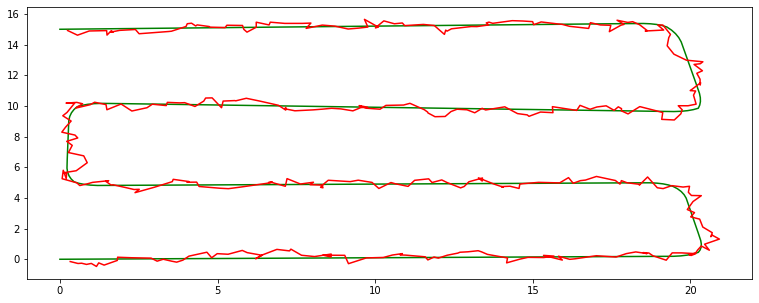

In [5]:
# Implement your code here.

kf3 = KalmanFilter(dim_x=2, dim_z=4)

kf3.x =gt_locations.iloc[0,:].to_numpy()
kf3.P = np.array([[2., 0.],[0.,2.] ])
kf3.R = np.array([[5., 0., 0., 0.], [0., 5., 0., 0.],[0., 0., 10., 0.],[0.,0., 0. ,10.]])
kf3.Q = np.array([[1., 0.], [0., 1.]])
kf3.F = np.identity(2)
kf3.H = np.array([[1. ,0],[0.,1.],[1.,0.],[0.,1.] ])
log=[]
for i in range(df.shape[0]):
#     print(gps_pos.iloc[i,:].shape)
#     print(gps_pos.iloc[i,:])
#     print(fusedData.iloc[i,:].shape)
    data=np.array(df.iloc[i, 3:7]).reshape((1,4))
    kf3.predict()
    kf3.update(data)
    log.append(kf3.x)
log=np.array(log)
# print(log.shape)
# print(log)

f = plt.figure(figsize=(13,5))
plt.plot(gt_locations.iloc[:, 0], gt_locations.iloc[:,1], 'g')
# plt.plot(log[:,0],log[:,1],c='r')
plt.plot(log[:,0],log[:,1], c='r')
error= np.sqrt(np.sum(np.mean((log - gt_locations.iloc[:, 0:2]) ** 2)))
print("The GPS error is ", error)



Q. The error is smaller than the error of the 2 independent Kalman Filters. Thus, some information was harvested from the correlation of the two sensors and thus the accuracy was improved.

## Measurement Fusion with Constant Velocity Kalman Filter

<a id='task2.4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.4 

Extend the KF model from previous problem 2.3 with use of constant velocity model instead of random walk model. Now the state vector $x$ becomes 4-dimensional including 2D position and velocity variables. Run algorithm using the dataset above and plot the KF results against the ground truth (GT) path. Compare the results using root mean square error (RMSE) between filter mean estimates and GT. Answer the questions.

<p> Use following setup, initial values, and parameters with your KF implementations:</p>
<p> * Initialize model state mean vector $\mathbf{x}= \begin{bmatrix}p_x \\ p_y \\ v_x \\ v_y \end{bmatrix}$ with position estimates ($p_x$, $p_y$) to the first ground truth location and velocity estimates ($v_x$, $v_y$) to zero </p>
<p> * Initialize model state covariance $\mathbf{P} = \begin{bmatrix} \sigma_{p_x}^2  & 0 & 0 & 0 \\ 0 & \sigma_{p_y}^2  & 0 & 0 \\ 0 & 0 & \sigma_{v_x}^2  & 0 \\ 0 & 0 & 0 & \sigma_{v_y}^2  \end{bmatrix}$ where $\sigma_{p_x}^2=2.0$ and $\sigma_{p_y}^2=2.0$ are position and $\sigma_{v_x}^2=2.0$ and $\sigma_{v_y}^2=2.0$ velocity noise variances, respectively</p>   
<p> * Use constant velocity dynamical model with
<br>
$
\begin{equation}
\mathbf{F}=\begin{bmatrix}
1 & 0 & \Delta t & 0\\
0 & 1 & 0 & \Delta t\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
, 
\mathbf{Q}=\begin{bmatrix}
q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2 & 0\\
0 & q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2\\
q_c \Delta t^2/2 & 0 & q_c \Delta t & 0\\
0 & q_c \Delta t^2/2 & 0 & q_c \Delta t
\end{bmatrix}
\end{equation}
$
<br>  
where time difference between samples is $\Delta t=0.25$ and spectral density of process noise is $q_c = 1.0$</p> 
<p> * Use measurement model with Gaussian noise $\mathbf{R} = \begin{bmatrix} \sigma_{GPS}^2 & 0 & 0 & 0 \\ 0 & \sigma_{GPS}^2 & 0 & 0 \\ 0 & 0 & \sigma_{WiFI}^2 & 0 \\ 0 & 0 & 0 &\sigma_{WiFi}^2 \end{bmatrix}$ where $\sigma_{GPS}^2=5.0$ and $\sigma_{WiFi}^2=10.0$</p>     
<p> * Set $\mathbf{H}$ based on dimensions of state and observation/measurement vectors
<br>
<br> 
<p> Q1. How well the KF with constant velocity model performs compared to previous models? </p>
</div>

(4,)
[0. 0. 0. 0.]
(380, 4)
Error is 0.3675229531779732


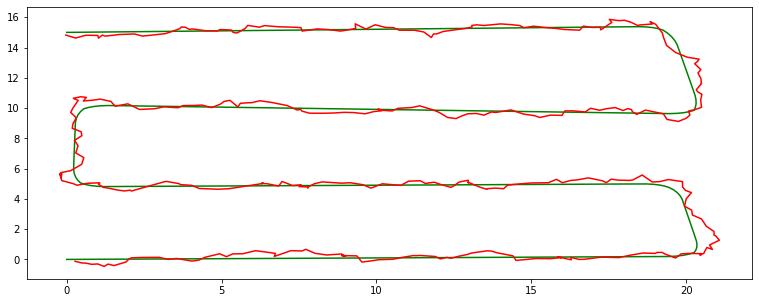

In [6]:
#Implement your code here.
dt=0.25
kf4 = KalmanFilter(dim_x=4, dim_z=4)
aux=gt_locations.iloc[0,:].to_numpy()
X=np.concatenate((aux,[0.,0.]))
print(X.shape)
print(X)
kf4.x =X
kf4.P = np.array([[2., 0., 0., 0.],[0.,2., 0., 0.],[0., 0., 2., 0.],[0., 0., 0., 2.] ])
kf4.R = np.array([[5., 0., 0., 0.], [0., 5., 0., 0.],[0., 0., 10., 0.],[0.,0., 0. ,10.]])
kf4.Q = np.array([[dt**3/3, 0., dt**2/2, 0.],[0., dt**3/3, 0., dt**2/2],[dt**2/2, 0., dt, 0.],[0., dt**2/2, 0., dt]])
kf4.F = np.array([[1., 0., dt, 0.],[0., 1., 0., dt],[0., 0., 1., 0.],[0., 0., 0., 1.]])
kf4.H = np.array([[1. ,0, dt**3/3, 0.],[0.,1., 0., dt**3/3],[1.,0., dt**3/3, 0.],[0.,1., 0., dt**3/3] ])
# kf4.H = np.array([[1. ,0, dt, 0.],[0.,1., 0., dt],[1.,0., dt, 0.],[0.,1., 0., dt] ])

log=[]
for i in range(df.shape[0]):
    data=np.array(df.iloc[i, 3:7]).reshape((1,4))
    kf4.predict()
    kf4.update(data)
    log.append(kf4.x)
log=np.array(log)
print(log.shape)
err_gps = np.sqrt(np.sum(np.mean((log[:,0:2] - gt_locations.iloc[:, 0:2]) ** 2)))
print("Error is",err_gps)
f = plt.figure(figsize=(13,5))
plt.plot(gt_locations.iloc[:, 0], gt_locations.iloc[:,1], 'g')
# plt.plot(log[:,0],log[:,1],c='r')
plt.plot(log[:,0],log[:,1], c='r')

Q. The model outperforms the two previous models because it considers more variable when predicting the motion